<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Only-Data-from-the-first-3-days" data-toc-modified-id="Only-Data-from-the-first-3-days-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Only Data from the first 3 days</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Generating-the-Model-on-Selected-Features" data-toc-modified-id="Generating-the-Model-on-Selected-Features-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Generating the Model on Selected Features</a></span></li></ul></li><li><span><a href="#XGBoost---Extreme-Gradient-Boosting" data-toc-modified-id="XGBoost---Extreme-Gradient-Boosting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>XGBoost - Extreme Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-Cross-Validation" data-toc-modified-id="Grid-Search-Cross-Validation-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Grid Search Cross-Validation</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
data = pd.read_excel("Data_demo.xlsx")

# Data Overview

age	- Patient age

age_cat - Patient age category  ['70-79', '50-59', '60-69', '30-49', '80+', '18-29']

gender  - M/F

weight	- Patient weight

height	- Patient height

BMI	BMI_cat	- ['18.5-24.9', '30+', '25-29.9', 'Below 18.5']

SCORE_1_0	- A score assessing the sevirity of the patients condition given by the hospital

SCORE2_0	- A score assessing the sevirity of the patients condition given by the hospital

DRUG_1_0	- One of two types of drugs given to treat te side effect of feeding intolerance - three days of data

DRUG_2_0	- One of two types of drugs given to treat te side effect of feeding intolerance - three days of data

Number_of_GIS_in_Day	- a sum of the gastrological symptoms per day

active_problem_cat - ['S', 'M', 'TN', 'TA'] S- Surgery, M- Medical oncology, TN- Transplant, TA- Trauma

ICU_LOS	    - ICU length of stay

LOS_Group	- ['LOS_8-13', 'LOS_5-7', 'LOS_3-4', 'LOS_14_and_more']

mortality	- 1 - deceased, 0 - alive

feeding_new - ['EN', 'EN+SPN'] EN- Enteral Nutrition, EN+SPN- Enteral Nutrition + Supplemental Parenteral Nutrition

first 14 days of data:

Diarrhea_Day_0 -

GIbleeding_Day_0 - general bleeding

In [30]:
data.head(3)

,ser_num,age,age_cat,gender,weight,height,BMI,BMI_cat,SCORE_1_0,SCORE2_0,...,DRUG_1_0,DRUG_1_1,DRUG_1_2,DRUG_2_0,DRUG_2_1,DRUG_2_2,ICU_LOS,LOS_Group,mortality,feeding_new
0,2,72,70-79,F,65.0,1.65,23.875115,18.5-24.9,16,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9,LOS_8-13,0,EN
1,3,58,50-59,M,101.0,1.75,32.979592,30+,23,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,LOS_5-7,0,EN
2,4,62,60-69,M,85.0,1.65,31.221304,30+,0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,3,LOS_3-4,0,EN


In [31]:
full_feature_list = list(data.columns)
full_feature_list

['ser_num',
 'age',
 'age_cat',
 'gender',
 'weight',
 'height',
 'BMI',
 'BMI_cat',
 'SCORE_1_0',
 'SCORE2_0',
 'SCORE2_2',
 'Delta_SCORE2',
 'active_problem_cat',
 'trauma',
 'oncologic (cancer)',
 'cardio',
 'pulmonary',
 'kidney',
 'metabolic',
 'gastrointestinal',
 'neurologic',
 'hematologic',
 'vascular',
 'Sepsis',
 'Diarrhea_Day_0',
 'Diarrhea_Day_1',
 'Diarrhea_Day_2',
 'Diarrhea_Day_3',
 'Diarrhea_Day_4',
 'Diarrhea_Day_5',
 'Diarrhea_Day_6',
 'Diarrhea_Day_7',
 'Diarrhea_Day_8',
 'Diarrhea_Day_9',
 'Diarrhea_Day_10',
 'Diarrhea_Day_11',
 'Diarrhea_Day_12',
 'Diarrhea_Day_13',
 'GIbleeding_Day_0',
 'GIbleeding_Day_1',
 'GIbleeding_Day_2',
 'GIbleeding_Day_3',
 'GIbleeding_Day_4',
 'GIbleeding_Day_5',
 'GIbleeding_Day_6',
 'GIbleeding_Day_7',
 'GIbleeding_Day_8',
 'GIbleeding_Day_9',
 'GIbleeding_Day_10',
 'GIbleeding_Day_11',
 'GIbleeding_Day_12',
 'GIbleeding_Day_13',
 'Vommiting_Day_0',
 'Vommiting_Day_1',
 'Vommiting_Day_2',
 'Vommiting_Day_3',
 'Vommiting_Day_4',
 'Vommi

In [32]:
## Unique Categories ## 
#data['age_cat'].unique()
#data['BMI_cat'].unique()
#data['LOS_Group'].unique()
#data['active_problem_cat'].unique()
#data['feeding_new'].unique()

In [33]:
data = data.drop(['ser_num'], axis = 1)
data.describe()

,age,weight,height,BMI,SCORE_1_0,SCORE2_0,SCORE2_2,Delta_SCORE2,trauma,oncologic (cancer),...,LT_70%ENcal_day12,LT_70%ENcal_day13,DRUG_1_0,DRUG_1_1,DRUG_1_2,DRUG_2_0,DRUG_2_1,DRUG_2_2,ICU_LOS,mortality
count,399.000000,399.000000,399.000000,399.000000,399.000000,362.000000,362.000000,362.000000,399.000000,399.000000,...,398.00000,398.000000,384.00000,384.000000,384.000000,384.000000,384.000000,384.000000,399.000000,399.000000
mean,58.368421,78.426817,1.693910,27.351338,15.413534,5.546961,3.251381,-2.295580,0.197995,0.273183,...,0.81407,0.829146,0.12500,0.213542,0.252604,0.007812,0.010417,0.026042,13.320802,0.218045
std,17.293276,19.458602,0.098448,6.718616,13.099615,4.385099,4.368778,5.221247,0.398989,0.446153,...,0.38954,0.376855,0.33115,0.410341,0.435073,0.088157,0.101662,0.159467,12.786902,0.413437
min,18.000000,32.000000,1.174000,8.159722,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,50.000000,68.000000,1.650000,23.437500,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,...,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,61.000000,75.000000,1.700000,26.122449,18.000000,6.000000,0.000000,-2.000000,0.000000,0.000000,...,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
75%,72.000000,88.000000,1.750000,29.759224,25.000000,9.000000,6.750000,0.000000,0.000000,1.000000,...,1.00000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000
max,98.000000,150.000000,2.400000,61.671247,115.000000,19.000000,20.000000,20.000000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,110.000000,1.000000


In [34]:
mortality_0 = data[data["mortality"] == 0]
mortality_1 = data[data["mortality"] == 1]


In [35]:
total_mortality = data["mortality"].count()
mortality_1_count = mortality_1["mortality"].count()
mortality_0_count = mortality_0["mortality"].count()

mortality_1_count_percentage = (mortality_1_count)/total_mortality*100
mortality_0_count_percentage = (mortality_0_count)/total_mortality*100

print((mortality_1_count)/total_mortality*100)
mortality_1_count
total_mortality

21.804511278195488


399

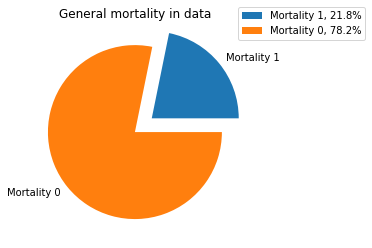

In [36]:
# General mortality in the data
y = np.array([mortality_1_count, mortality_0_count])
labels = ["Mortality 1", "Mortality 0"]
sizes = [mortality_1_count_percentage,mortality_0_count_percentage]
myexplode = [0.25, 0]

plt.pie(y, labels = labels, explode = myexplode)
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.95, 1.1), loc='upper left', labels=labels)
plt.title("General mortality in data")

plt.show() 

In [37]:
# Show mortality based on age group

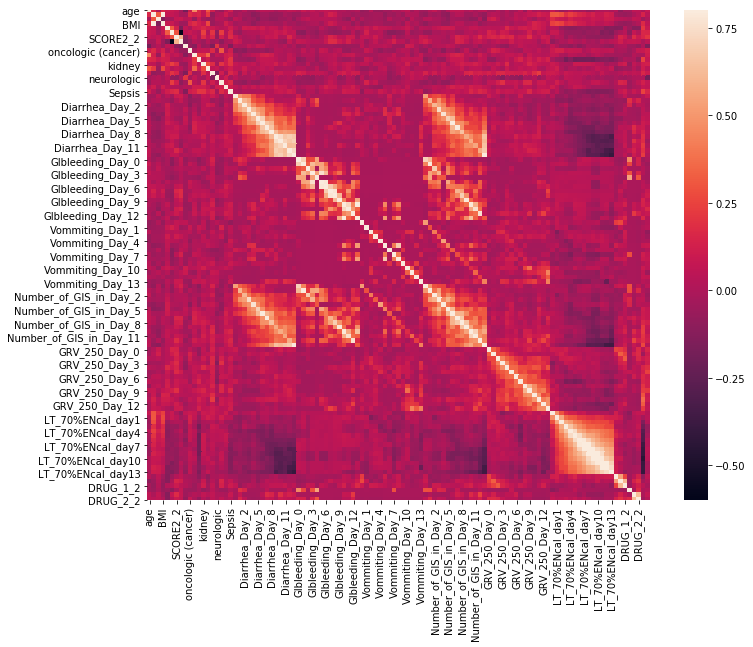

In [38]:
# Method of correlation:
# pearson : standard correlation coefficient
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

# Only Data from the first 3 days

## Data Cleaning

In [39]:
# Summing the occurence of symptoms for the first three days in the ICU
data['first_day_symptoms'] = data['Diarrhea_Day_0'] + data['GIbleeding_Day_0'] + data['Vommiting_Day_0']
data['second_day_symptoms'] = data['Diarrhea_Day_1'] + data['GIbleeding_Day_1'] + data['Vommiting_Day_1']
data['third_day_symptoms'] = data['Diarrhea_Day_2'] + data['GIbleeding_Day_2'] + data['Vommiting_Day_2']
data['summed_symptoms'] = data['first_day_symptoms'] + data['second_day_symptoms'] + data['third_day_symptoms']
#data['summedSymptoms']

In [40]:
# Remove all columns between the column names
three_days_data = data.drop(data.loc[:, 'Diarrhea_Day_3':'Diarrhea_Day_13'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'GIbleeding_Day_3':'GIbleeding_Day_13'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'Vommiting_Day_3':'Number_of_GIS_in_Day_13_cat'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'GRV_250_Day_3':'GRV_250_Day_13'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'LT_70%ENcal_day3':'LT_70%ENcal_day13'].columns, axis = 1)
#three_days_data

In [41]:
full_feature_list = list(three_days_data.columns)
full_feature_list

['age',
 'age_cat',
 'gender',
 'weight',
 'height',
 'BMI',
 'BMI_cat',
 'SCORE_1_0',
 'SCORE2_0',
 'SCORE2_2',
 'Delta_SCORE2',
 'active_problem_cat',
 'trauma',
 'oncologic (cancer)',
 'cardio',
 'pulmonary',
 'kidney',
 'metabolic',
 'gastrointestinal',
 'neurologic',
 'hematologic',
 'vascular',
 'Sepsis',
 'Diarrhea_Day_0',
 'Diarrhea_Day_1',
 'Diarrhea_Day_2',
 'GIbleeding_Day_0',
 'GIbleeding_Day_1',
 'GIbleeding_Day_2',
 'Vommiting_Day_0',
 'Vommiting_Day_1',
 'Vommiting_Day_2',
 'GRV_250_Day_0',
 'GRV_250_Day_1',
 'GRV_250_Day_2',
 'LT_70%ENcal_day0',
 'LT_70%ENcal_day1',
 'LT_70%ENcal_day2',
 'DRUG_1_0',
 'DRUG_1_1',
 'DRUG_1_2',
 'DRUG_2_0',
 'DRUG_2_1',
 'DRUG_2_2',
 'ICU_LOS',
 'LOS_Group',
 'mortality',
 'feeding_new',
 'first_day_symptoms',
 'second_day_symptoms',
 'third_day_symptoms',
 'summed_symptoms']

In [42]:
## LOS_Group prediction by symptoms 

In [43]:
three_days_data.head(3)

,age,age_cat,gender,weight,height,BMI,BMI_cat,SCORE_1_0,SCORE2_0,SCORE2_2,...,DRUG_2_1,DRUG_2_2,ICU_LOS,LOS_Group,mortality,feeding_new,first_day_symptoms,second_day_symptoms,third_day_symptoms,summed_symptoms
0,72,70-79,F,65.0,1.65,23.875115,18.5-24.9,16,0.0,0.0,...,0.0,0.0,9,LOS_8-13,0,EN,0,0,2,2
1,58,50-59,M,101.0,1.75,32.979592,30+,23,9.0,7.0,...,0.0,0.0,5,LOS_5-7,0,EN,0,1,0,1
2,62,60-69,M,85.0,1.65,31.221304,30+,0,0.0,0.0,...,0.0,1.0,3,LOS_3-4,0,EN,0,0,0,0


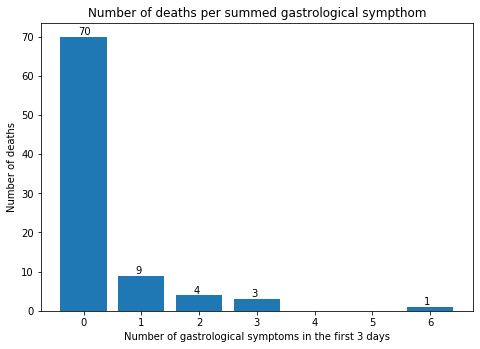

In [44]:
mortality_1_3_days = three_days_data[three_days_data["mortality"] == 1]
x = mortality_1_3_days['summed_symptoms'].unique()
x.sort()
y =[]
for i in x:
    y.append(mortality_1_3_days[mortality_1_3_days["summed_symptoms"] == i]['summed_symptoms'].count())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)

ax.set_title('Number of deaths per summed gastrological sympthom')
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Number of gastrological symptoms in the first 3 days')

for index, value in enumerate (x):
    plt.text(value-0.1, y[index]+0.5, str(y[index]))
    
plt.show()

In [45]:
#mortality_1_3_days

# Machine Learning

In [342]:
from sklearn.model_selection import train_test_split

In [343]:
three_days_data.head(3)

,age,age_cat,gender,weight,height,BMI,BMI_cat,SCORE_1_0,SCORE2_0,SCORE2_2,...,DRUG_2_1,DRUG_2_2,ICU_LOS,LOS_Group,mortality,feeding_new,first_day_symptoms,second_day_symptoms,third_day_symptoms,summed_symptoms
0,72,70-79,F,65.0,1.65,23.875115,18.5-24.9,16,0.0,0.0,...,0.0,0.0,9,LOS_8-13,0,EN,0,0,2,2
1,58,50-59,M,101.0,1.75,32.979592,30+,23,9.0,7.0,...,0.0,0.0,5,LOS_5-7,0,EN,0,1,0,1
2,62,60-69,M,85.0,1.65,31.221304,30+,0,0.0,0.0,...,0.0,1.0,3,LOS_3-4,0,EN,0,0,0,0


In [362]:
y = three_days_data['mortality'] # Labels

In [363]:
feature_names = ['age', 'BMI_cat', 'SCORE2_0','active_problem_cat','GRV_250_Day_0','GRV_250_Day_1','GRV_250_Day_2',
                 'LT_70%ENcal_day0','LT_70%ENcal_day1','LT_70%ENcal_day2', 'first_day_symptoms',
                 'second_day_symptoms', 'third_day_symptoms', 'summed_symptoms']
X = three_days_data[feature_names] # Features

# Mapping each category to a vector that contains 1 and 0, denoting the presence or absence of the feature. 
X = pd.get_dummies(X, columns=['BMI_cat','active_problem_cat']) 

# Dealing with NaN values
X = X.fillna(0)
X.isnull().sum().sum()

0

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 80% training and 20% test
X_train.shape, X_test.shape

((319, 20), (80, 20))

## Random Forest Classifier
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.


In [365]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Creating a Gaussian Classifier 
# n_estimators- number of trees to be used in the forest.
clf=RandomForestClassifier(n_estimators=100)

#Training the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [366]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7625


In [367]:
# By looking at the model feature importance we might get insight into real life contributing factors in a paitents healthplan
# And take adventage of the model analasys by giving more priorty to those features in desiging the sutable care plan. 
feature_importance = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance

age                      0.245953
SCORE2_0                 0.162221
GRV_250_Day_2            0.060575
GRV_250_Day_1            0.050704
GRV_250_Day_0            0.044787
LT_70%ENcal_day2         0.040588
active_problem_cat_TN    0.040147
LT_70%ENcal_day1         0.037570
BMI_cat_18.5-24.9        0.035613
BMI_cat_25-29.9          0.035601
summed_symptoms          0.034849
active_problem_cat_S     0.031453
active_problem_cat_M     0.027738
active_problem_cat_TA    0.027443
LT_70%ENcal_day0         0.027285
BMI_cat_30+              0.026420
first_day_symptoms       0.020947
BMI_cat_Below 18.5       0.017421
third_day_symptoms       0.017312
second_day_symptoms      0.015371
dtype: float64

### Generating the Model on Selected Features
By removing the least contributing features we might improve the model

In [368]:
# The three least contributing factors to the model
least_important_features = feature_importance.tail(3).index
least_important_features

Index(['BMI_cat_Below 18.5', 'third_day_symptoms', 'second_day_symptoms'], dtype='object')

In [369]:
#removing the least contributing features
X_Selected = X.copy();
X_Selected.drop(least_important_features, axis=1, inplace=True)

In [370]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_Selected, y, test_size=0.20, random_state=5) # 80% training and 20% test
X_train.shape, X_test.shape

((319, 17), (80, 17))

In [371]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


As can be seen after removing the three least important features the accuracy increased.

This is because we removed misleading data and noise, resulting in an increased accuracy.

A lesser amount of features also reduces the training time.

## XGBoost - Extreme Gradient Boosting

In [372]:
import xgboost as xgb
#from xgboost import XGBClassifier

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5) # 80% training and 20% test
X_train.shape, X_test.shape

((319, 20), (80, 20))

In [394]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [395]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

By default, the predictions made by XGBoost are probabilities. 

Because this is a binary classification problem, each prediction is the probability of the input pattern belonging to the first class.

We can easily convert them to binary class values by rounding them to 0 or 1.

In [396]:
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.50%


###  Grid Search Cross-Validation
GridSearchCV tries all the combinations of the values passed in the parameters and evaluates the model for each combination using the Cross-Validation method.

It helps choose the best hyperparameters that fit our estimator (model) on your training set most accurately 

We choose the best hyperparameters using the ROC AUC metric to compare the results of 10-fold cross-validation.

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

In [444]:
from sklearn.model_selection import GridSearchCV

In [445]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [446]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [447]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [448]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  60 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 380 tasks      | elapsed:    9.8s
[Parallel(n_jobs=10)]: Done 630 tasks      | elapsed:   18.0s
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:   29.3s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
            

In [449]:
# The best_estimator_ field contains the best model trained by GridSearch.
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Evaluation

In [450]:
y_pred = grid_search.best_estimator_.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.25%


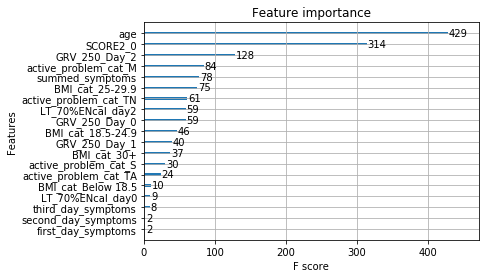

<Figure size 1152x864 with 0 Axes>

In [451]:
xgb.plot_importance(grid_search.best_estimator_)
plt.figure(figsize = (16, 12))
plt.show()